In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
file = "Resources/scrubbed_csv.csv"


ufo_data = pd.read_csv(file)

ufo_data.head()

C:\Users\kendr\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (5,9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [3]:
ufo_clean = ufo_data.dropna()


#print(len(ufo_clean))


ufo_clean = ufo_clean.loc[ufo_clean["country"] == "us"]

#print(len(ufo_clean))

ufo_clean.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611
5,10/10/1961 19:00,bristol,tn,us,sphere,300,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.595,-82.188889
7,10/10/1965 23:45,norwalk,ct,us,disk,1200,20 minutes,A bright orange color changing to reddish colo...,10/2/1999,41.1175,-73.408333


In [4]:
ufo_clean[['month', 'day', 'year']] = ufo_clean['datetime'].str.split('/',expand=True)
ufo_clean[['year', 'time']] = ufo_clean['year'].str.split(' ',expand=True)

In [5]:
ufo_data = ufo_clean[["city", "state", "shape", "month", "day", "year", "time", "latitude", "longitude ", "duration (seconds)" ]]

ufo_data = ufo_data.dropna()

ufo_data.head(15)

,city,state,shape,month,day,year,time,latitude,longitude,duration (seconds)
0,san marcos,tx,cylinder,10,10,1949,20:30,29.8830556,-97.941111,2700
3,edna,tx,circle,10,10,1956,21:00,28.9783333,-96.645833,20
4,kaneohe,hi,light,10,10,1960,20:00,21.4180556,-157.803611,900
5,bristol,tn,sphere,10,10,1961,19:00,36.595,-82.188889,300
7,norwalk,ct,disk,10,10,1965,23:45,41.1175,-73.408333,1200
8,pell city,al,disk,10,10,1966,20:00,33.5861111,-86.286111,180
9,live oak,fl,disk,10,10,1966,21:00,30.2947222,-82.984167,120
10,hawthorne,ca,circle,10,10,1968,13:00,33.9163889,-118.351667,300
11,brevard,nc,fireball,10,10,1968,19:00,35.2333333,-82.734444,180
12,bellmore,ny,disk,10,10,1970,16:00,40.6686111,-73.527500,1800


In [52]:
ufo_data["shape"].value_counts()

light        13407
other         8961
triangle      6511
circle        6077
fireball      5120
sphere        4310
disk          4070
oval          3004
formation     1979
cigar         1627
changing      1566
rectangle     1062
flash         1061
cylinder      1014
diamond        920
chevron        812
teardrop       590
egg            577
cone           246
cross          185
Name: shape, dtype: int64

In [7]:
# Combining similar shapes together
ufo_data = ufo_data.replace(
    {"unknown": "other", "delta": "other","round": "other", "changed": "other","pyramid": "other", "hexagon": "other","crescent": "other", "flare": "other"})
ufo_data["shape"].value_counts()

light        13407
other         8961
triangle      6511
circle        6077
fireball      5120
sphere        4310
disk          4070
oval          3004
formation     1979
cigar         1627
changing      1566
rectangle     1062
flash         1061
cylinder      1014
diamond        920
chevron        812
teardrop       590
egg            577
cone           246
cross          185
Name: shape, dtype: int64

In [8]:
# List all the columns in the table
ufo_data.columns

Index(['city', 'state', 'shape', 'month', 'day', 'year', 'time', 'latitude',
       'longitude ', 'duration (seconds)'],
      dtype='object')

In [70]:
# Using GroupBy in order to separate the data into fields according to "state" values
grouped_usa_df = ufo_data.groupby(['state','shape'])

# The object returned is a "GroupBy" object and cannot be viewed normally...
print(grouped_usa_df)

# In order to be visualized, a data function must be used...
grouped_usa_df.count()

city  month  day  year  time  latitude  longitude   \
state shape                                                           
ak    changing      5      5    5     5     5         5           5   
      cigar         6      6    6     6     6         6           6   
      circle       26     26   26    26    26        26          26   
      cone          1      1    1     1     1         1           1   
      cylinder      4      4    4     4     4         4           4   
...               ...    ...  ...   ...   ...       ...         ...   
wy    other        25     25   25    25    25        25          25   
      oval          8      8    8     8     8         8           8   
      rectangle     2      2    2     2     2         2           2   
      sphere       13     13   13    13    13        13          13   
      triangle     14     14   14    14    14        14          14   

                 duration (seconds)  
state shape                          
ak    changing                    5  
      cigar                       6  
      circle                     26  
      cone                        1  
      cylinder                    4  
...                             ...  
wy    other                      25  
      oval                        8  
      rectangle                   2  
      sphere                     13  
      triangle                   14  

[995 rows x 8 columns]

In [58]:
shape_counts=grouped_usa_df["shape"].value_counts()
shape_counts

state  shape    
ak     light        87
       other        36
       circle       26
       disk         26
       sphere       25
                    ..
wy     egg           3
       cigar         2
       rectangle     2
       diamond       1
       flash         1
Name: shape, Length: 995, dtype: int64

In [59]:
# Convert the state_counts Series into a DataFrame
state_shape_counts_df = pd.DataFrame(shape_counts)
state_shape_counts_df

shape
state shape           
ak    light         87
      other         36
      circle        26
      disk          26
      sphere        25
...                ...
wy    egg            3
      cigar          2
      rectangle      2
      diamond        1
      flash          1

[995 rows x 1 columns]

In [73]:
# Convert the column name into "Number of Shapes Per State"
state_shape_counts_df = state_shape_counts_df.rename(
    columns={"shape": "Number of Shapes Per State"})
state_shape_counts_df
state_shape_counts_df.to_csv("Resources/state_shape_counts_dfs.csv", index=True)

In [66]:
most_shapes = state_shape_counts_df.sort_values(["state", "Number of Shapes Per State"], ascending=False)
most_shapes

Number of Shapes Per State
state shape                                
wy    light                              47
      other                              25
      circle                             15
      fireball                           14
      triangle                           14
...                                     ...
ak    diamond                             4
      rectangle                           3
      cone                                1
      egg                                 1
      teardrop                            1

[995 rows x 1 columns]

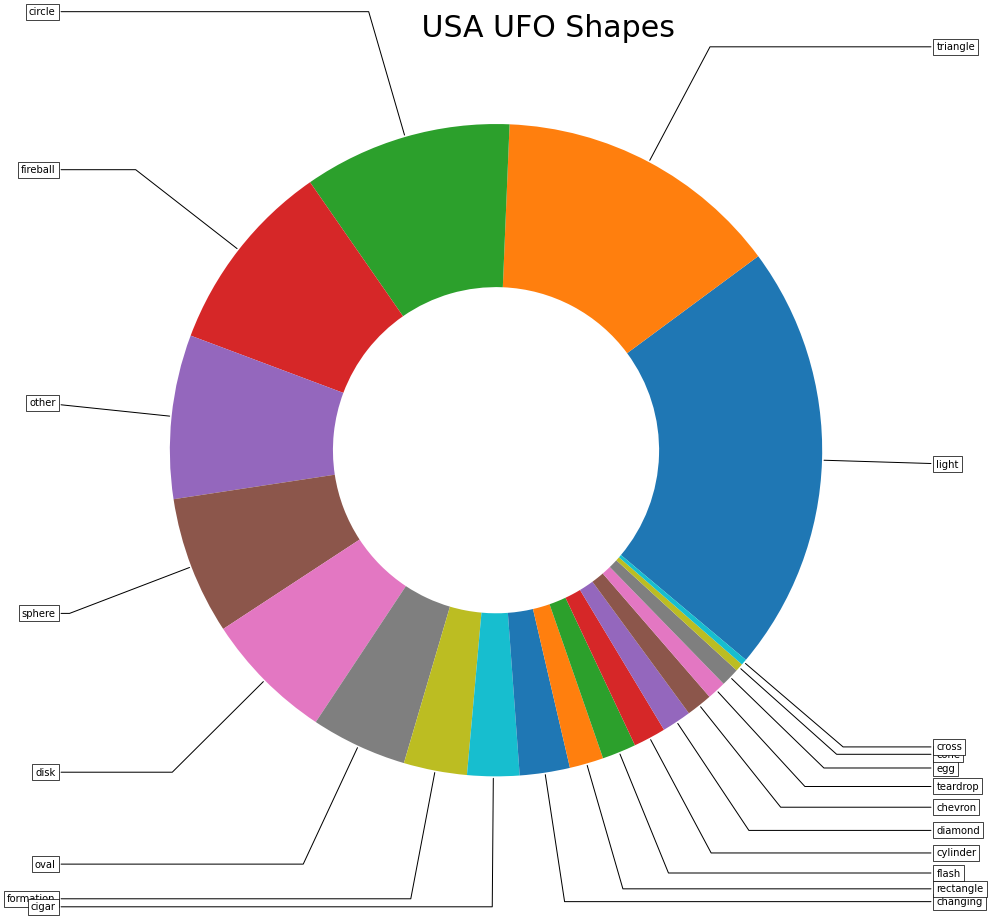

In [84]:
# Pie charno_null_ufo_df["shape"].value_counts()t, where the slices will be ordered and plotted counter-clockwise:
fig, ax = plt.subplots(figsize=(20, 15), subplot_kw=dict(aspect="equal"))

labels = ['light','triangle','circle', 'fireball','other','sphere','disk','oval', 'formation','cigar', 'changing','rectangle', 'flash','cylinder', 'diamond', 'chevron','teardrop','egg','cone', 'cross'] 
sizes = [ 13407, 8961, 6511, 6077, 5120, 4310, 4070, 3004, 1979,1627, 1566, 1062, 1061, 1014, 920, 812, 590,577, 246, 185]


wedges, texts = ax.pie(sizes, wedgeprops=dict(width= 0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(labels[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("           USA UFO Shapes", fontsize=30)
plt.savefig("../Project1/UFO_Shapes_USA.png")
plt.show()
